In [1]:
import numpy as np

# Activation function: sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Loss function: Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# RNN class definition
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.U = np.random.randn(hidden_size, input_size)  # Input to hidden
        self.W = np.random.randn(hidden_size, hidden_size) # Hidden to hidden
        self.V = np.random.randn(output_size, hidden_size) # Hidden to output

        # Initialize biases
        self.b = np.zeros((hidden_size, 1))
        self.c = np.zeros((output_size, 1))

        # Hidden state initialization
        self.hidden_state = np.zeros((hidden_size, 1))

    def forward(self, x):
        # Forward pass for each time step
        self.hidden_state = sigmoid(np.dot(self.U, x) + np.dot(self.W, self.hidden_state) + self.b)
        y_pred = sigmoid(np.dot(self.V, self.hidden_state) + self.c)
        return y_pred

    def backward(self, x, y_true, y_pred, learning_rate=0.01):
        # Compute output error
        output_error = y_pred - y_true
        output_delta = output_error * sigmoid_derivative(y_pred)

        # Compute hidden error
        hidden_error = np.dot(self.V.T, output_delta)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_state)

        # Update weights and biases
        self.V -= learning_rate * np.dot(output_delta, self.hidden_state.T)
        self.U -= learning_rate * np.dot(hidden_delta, x.T)
        self.W -= learning_rate * np.dot(hidden_delta, self.hidden_state.T)
        self.b -= learning_rate * hidden_delta
        self.c -= learning_rate * output_delta

    def train(self, X, Y, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(len(X)):
                # Forward pass
                x = X[i].reshape(-1, 1)
                y_true = Y[i].reshape(-1, 1)
                y_pred = self.forward(x)

                # Compute loss
                epoch_loss += mean_squared_error(y_true, y_pred)

                # Backward pass
                self.backward(x, y_true, y_pred, learning_rate)

            # Print the loss for every 100th epoch
            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{epochs}, Loss: {epoch_loss / len(X)}')

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            x = X[i].reshape(-1, 1)
            y_pred = self.forward(x)
            predictions.append(y_pred.flatten())
        return np.array(predictions)

# Sample data for demonstration
# Input data (X): 3 samples, each with 2 features
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0]
])

# Target data (Y): 3 samples, each with 1 output
Y = np.array([
    [0],
    [1],
    [1]
])

# Instantiate and train the RNN
input_size = 2
hidden_size = 4
output_size = 1
rnn = SimpleRNN(input_size, hidden_size, output_size)

# Train the RNN
rnn.train(X, Y, epochs=1000, learning_rate=0.01)

# Predict
predictions = rnn.predict(X)
print("\nPredictions:")
print(predictions)


Epoch 0/1000, Loss: 0.28983727665951137
Epoch 100/1000, Loss: 0.23855701020834816
Epoch 200/1000, Loss: 0.22885736759293937
Epoch 300/1000, Loss: 0.22234660747756083
Epoch 400/1000, Loss: 0.2175194630021878
Epoch 500/1000, Loss: 0.21359195325049182
Epoch 600/1000, Loss: 0.21015185135650294
Epoch 700/1000, Loss: 0.2069774736517839
Epoch 800/1000, Loss: 0.20394643187196015
Epoch 900/1000, Loss: 0.20098928975323774

Predictions:
[[0.57488683]
 [0.56142257]
 [0.73405938]]
Epoch 0/1000, Loss: 0.28983727665951137
Epoch 100/1000, Loss: 0.23855701020834816
Epoch 200/1000, Loss: 0.22885736759293937
Epoch 300/1000, Loss: 0.22234660747756083
Epoch 400/1000, Loss: 0.2175194630021878
Epoch 500/1000, Loss: 0.21359195325049182
Epoch 600/1000, Loss: 0.21015185135650294
Epoch 700/1000, Loss: 0.2069774736517839
Epoch 800/1000, Loss: 0.20394643187196015
Epoch 900/1000, Loss: 0.20098928975323774

Predictions:
[[0.57488683]
 [0.56142257]
 [0.73405938]]


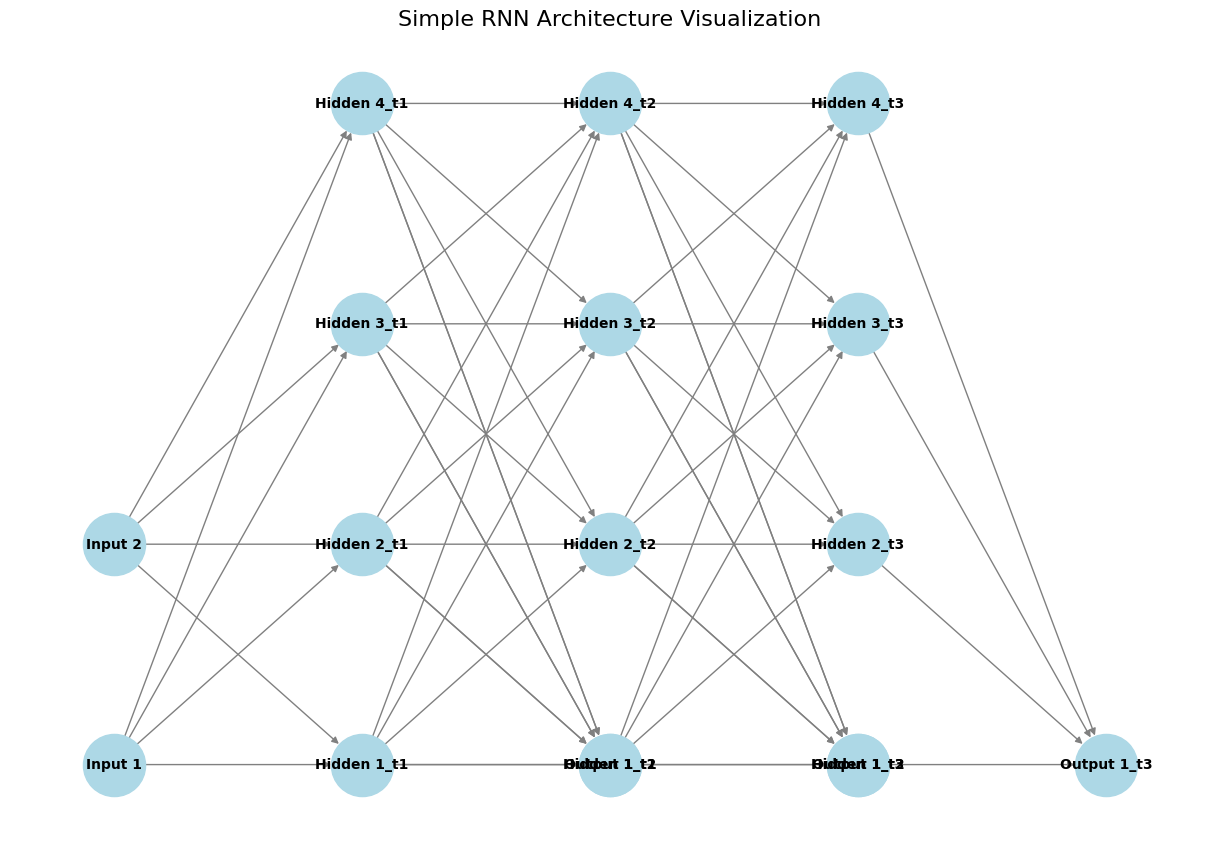

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_rnn(input_size, hidden_size, output_size, time_steps=3):
    """
    Visualizes a simple RNN architecture using matplotlib and networkx.
    
    Args:
        input_size (int): Number of input features.
        hidden_size (int): Number of hidden units.
        output_size (int): Number of output units.
        time_steps (int): Number of time steps to show.
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Define layers and node positions
    input_nodes = [f'Input {i+1}' for i in range(input_size)]
    hidden_nodes = [f'Hidden {i+1}_t{t}' for t in range(1, time_steps+1) for i in range(hidden_size)]
    output_nodes = [f'Output {i+1}_t{t}' for t in range(1, time_steps+1) for i in range(output_size)]

    # Set positions for the nodes
    pos = {}
    layer_gap = 3
    node_gap = 1

    # Input layer positions
    for i, node in enumerate(input_nodes):
        pos[node] = (0, i * node_gap)

    # Hidden layer positions for each time step
    for t in range(time_steps):
        for i in range(hidden_size):
            pos[f'Hidden {i+1}_t{t+1}'] = ((t+1) * layer_gap, i * node_gap)

    # Output layer positions for each time step
    for t in range(time_steps):
        for i in range(output_size):
            pos[f'Output {i+1}_t{t+1}'] = ((t+2) * layer_gap, i * node_gap)

    # Add nodes to the graph
    G.add_nodes_from(input_nodes + hidden_nodes + output_nodes)

    # Add edges for input to hidden connections (first time step)
    for input_node in input_nodes:
        for i in range(hidden_size):
            G.add_edge(input_node, f'Hidden {i+1}_t1')

    # Add edges for hidden to hidden connections across time steps
    for t in range(time_steps - 1):
        for i in range(hidden_size):
            for j in range(hidden_size):
                G.add_edge(f'Hidden {i+1}_t{t+1}', f'Hidden {j+1}_t{t+2}')

    # Add edges for hidden to output connections at each time step
    for t in range(time_steps):
        for i in range(hidden_size):
            for j in range(output_size):
                G.add_edge(f'Hidden {i+1}_t{t+1}', f'Output {j+1}_t{t+1}')

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold', edge_color='gray')
    plt.title('Simple RNN Architecture Visualization', fontsize=16)
    plt.show()

# Visualize the RNN model
visualize_rnn(input_size=2, hidden_size=4, output_size=1, time_steps=3)
